In [3]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.python.keras.utils.np_utils import to_categorical
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [24]:
digits_train = pd.read_csv("data/train.csv")


#input data for awnsering opdracht
digits_test = pd.read_csv("data/test.csv")
test_data_in = digits_test.to_numpy()
test_data = np.reshape(test_data_in, (test_data_in.shape[0], 28, 28))
test_data = np.expand_dims(test_data, axis=3)

#split traindata for train and validation data and labels
msk = np.random.rand(len(digits_train)) < 0.8 # maak een random mask voor het splitsen tussen train data en verification data.
#msk is een bool list die random zijn.
train = digits_train[msk]
val = digits_train[~msk]

#to numpy
train_data_in = train.to_numpy()
val_data_in = val.to_numpy()


# get labels
train_labels = train_data_in[:, 0]  # get first colom from the training data
val_labels = val_data_in[:, 0]  # get first colom from the training data
train_data_without_label = train_data_in[:, 1:]  # remove first colom (labels) from the training data
val_data_without_label = val_data_in[:, 1:]  # remove first colom (labels) from the training data


# make a 3d array (size, 28, 28)
train_data = np.reshape(train_data_without_label, (train_data_without_label.shape[0], 28, 28))
val_data = np.reshape(val_data_without_label, (val_data_without_label.shape[0], 28, 28))

# make proper dimensions
train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)

#print(train_labels.shape)
#print(train_data.shape)
#print(val_labels.shape)
#print(val_data.shape)
#print(test_data.shape)

[ True  True  True ...  True  True  True]


In [55]:
# variables for model
num_filters = 2
filter_size = (3, 3)
pool_size = (2, 2) # Deze pool_size is klein omdat de dataset klein (28x28) is. wanneer deze hoger is zullen er meer fouten in komen. (bijvoorbeeld bij een open 0 en een 6)

model = Sequential([])

model.add(Conv2D(2, (3, 3), padding='same', activation='relu', input_shape=train_data.shape[1:]))
model.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model training:

In [56]:
h = model.fit(train_data, train_labels, epochs=16, validation_data=(val_data, val_labels))

Epoch 1/16
1052/1052 [==============================] - 4s 3ms/step - loss: 2.1510 - accuracy: 0.8528 - val_loss: 0.3883 - val_accuracy: 0.9203
Epoch 2/16
1052/1052 [==============================] - 3s 3ms/step - loss: 0.2390 - accuracy: 0.9392 - val_loss: 0.2389 - val_accuracy: 0.9389
Epoch 3/16
1052/1052 [==============================] - 3s 3ms/step - loss: 0.1486 - accuracy: 0.9560 - val_loss: 0.1872 - val_accuracy: 0.9482
Epoch 4/16
1052/1052 [==============================] - 4s 3ms/step - loss: 0.1149 - accuracy: 0.9642 - val_loss: 0.1672 - val_accuracy: 0.9528
Epoch 5/16
1052/1052 [==============================] - 3s 3ms/step - loss: 0.1003 - accuracy: 0.9681 - val_loss: 0.1540 - val_accuracy: 0.9541
Epoch 6/16
1052/1052 [==============================] - 4s 3ms/step - loss: 0.0909 - accuracy: 0.9705 - val_loss: 0.1613 - val_accuracy: 0.9566
Epoch 7/16
1052/1052 [==============================] - 4s 3ms/step - loss: 0.0818 - accuracy: 0.9736 - val_loss: 0.1477 - val_accuracy:

In [57]:
test_loss, test_acc = model.evaluate(train_data,  train_labels, verbose=2)
print("accuracy = {}".format(test_acc))

1052/1052 - 2s - loss: 0.0346 - accuracy: 0.9869
accuracy = 0.9869261384010315


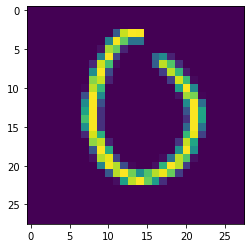

[[9.9984801e-01 2.9678319e-27 2.4332924e-14 1.6775112e-16 7.7438479e-22
  6.2988491e-15 1.5199200e-04 1.4679307e-24 1.1990804e-12 7.5950773e-12]]
0


In [53]:
img = 110

# plot test image
plt.imshow(test_data[img, :, :, 0])
plt.show()

#predict test image and print the answer
x = np.expand_dims(test_data[img], axis=0)
prediction = model.predict(x)
print(prediction)
print(np.argmax(prediction))

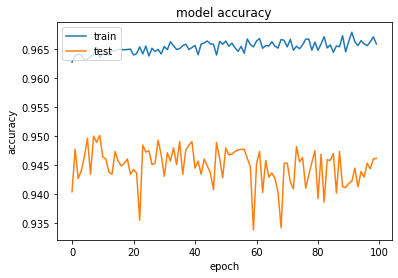

In [54]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()